# unit11 지하철 유무임 승차 데이터

문제1. 유임 승차가 가장 많은 역

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('subwayfee.csv', encoding='cp949')
df = df.replace(',', '', regex=True)
df = df.dropna() # 누락된 행 버리기
df.shape

(597, 9)

In [25]:
df.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20


In [26]:
# 배열로 변경
arr = np.array(df)

In [32]:
유임승차 = (arr[:, 4]).astype(np.int)
arr[np.argmax(유임층차), 3], np.max(유임승차), np.argmax(유임승차)

('강남', 2894341, 31)

문제2. 유임 승차 비율이 가장 높은 역

In [34]:
무임승차 = (arr[:, 6]).astype(np.int)
유임승차비율 = 유임승차/(무임승차+1)
arr[np.argmax(유임승차비율), 1:4:2], np.max(유임승차비율), np.argmax(유임승차비율)

(array(['분당선', '복정'], dtype=object), 24.0, 237)

문제3. 유무임 승하차 인원이 가장 많은 역

In [45]:
전체승하차인원 = arr[:, 4:8].astype(np.int)
역이용횟수 = np.sum(전체승하차인원, axis=1)
역이용횟수최대 = arr[np.argmax(역이용횟수), 1:4:2], np.max(역이용횟수),  np.argmax(역이용횟수)
역이용횟수최대

(array(['2호선', '강남'], dtype=object), 6234453, 31)

In [46]:
전체승차인원 = arr[:, 4:6].astype(np.int)
승차횟수 = np.sum(전체승차인원, axis=1)
승차횟수최대 = arr[np.argmax(승차횟수), 1:4:2], np.max(승차횟수),  np.argmax(승차횟수)
승차횟수최대

(array(['2호선', '강남'], dtype=object), 5868719, 31)

문제4. 모든 역의 유무임 승차 비율은 어떻게 될까

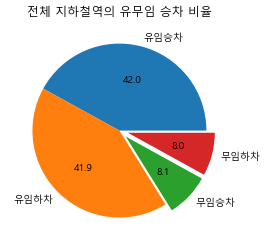

In [61]:
a = np.sum(arr[:, 4:8].astype(np.int), axis=0)
plt.rc('font', family='Malgun Gothic') #한글
n = plt.pie(a, labels=df.columns[4:8], autopct='%.1f', explode=[0,0,0.1,0.1])
#plt.legend()
plt.title('전체 지하철역의 유무임 승차 비율')
plt.savefig('all_subway_ratio.png')

문제5. 모든 역마다 유무임 승차 비율을 따로 파이 차트로 나타내기 (50만영 이상만 승차하는 역만)

In [78]:
for i in range(len(arr)):
    row = arr[i]
    승차인원 = row[4:8].astype(np.int)
    유임승차 = 승차인원[0]
    if 유임승차 > 2000000:
        plt.rc('font', family='Malgun Gothic') #한글
        n = plt.pie(row[4:8], labels = df.columns[4:8], autopct='%.1f', explode=[0,0,0.1,0.1])
        #plt.legend()
        역이름 = row[3]
        파일명 = '핫플_subway_'+역이름+'.png'
        타이틀명 = 역이름+'역의 유무임 승차 비율'
        plt.title(타이틀명)
        plt.savefig(파일명)
        plt.close()
